<a href="https://colab.research.google.com/github/Toyinbee/phisihing-Detection/blob/main/Phishing_model_1(dataset_csv).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
Mount on drive

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
!pip install tensorflow==2.19.0
import tensorflow as tf
print(tf.__version__)  # Should show 2.19.0

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 644.9/644.9 MB 3.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 99.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 107.4 MB/s eta 0:00:00
  Attempting uninstall: ml-dtypes
    Found existing installation: ml-dtypes 0.4.1
    Uninstalling ml-dtypes-0.4.1:
      Successfully uninstalled ml-dtypes-0.4.1
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.18.0
    Uninstalling tensorboard-2.18.0:
      Successfully uninstalled tensorboard-2.18.0
  Attempting uninstall: tensorflow
    Found existing installation: tensorflow 2.18.0
    Uninstalling tensorflow-2.18.0:
      Successfully uninstalled tensorflow-2.18.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.18.0 requires tensorflow<2.19,>=2.18, but you have tensorflow 2.19.0 

In [ ]:
# Data Handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix

# Deep Learning (CNN, LSTM)
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Dense, Conv1D, MaxPooling1D, Flatten, Dropout, Input, LSTM, Bidirectional
from tensorflow.keras.layers import Embedding, Reshape

# XGBoost
import xgboost as xgb

# Timing

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Phishing /Dataset.csv')
df.head()

,Type,url_length,number_of_dots_in_url,having_repeated_digits_in_url,number_of_digits_in_url,number_of_special_char_in_url,number_of_hyphens_in_url,number_of_underline_in_url,number_of_slash_in_url,number_of_questionmark_in_url,...,having_digits_in_subdomain,number_of_digits_in_subdomain,having_repeated_digits_in_subdomain,having_path,path_length,having_query,having_fragment,having_anchor,entropy_of_url,entropy_of_domain
0,0,37,2,0,0,8,0,0,5,0,...,0,0,1,0,3,0,0,0,4.010412,2.751629
1,1,70,5,0,0,12,0,0,6,0,...,0,0,1,0,4,0,0,0,4.089470,3.532573
2,0,42,2,0,6,8,0,0,3,1,...,0,0,1,0,1,1,0,0,4.386016,3.344698
3,0,46,2,0,0,7,0,0,4,0,...,0,0,1,0,2,0,0,0,4.221947,3.189898
4,0,51,3,0,0,9,0,0,5,0,...,0,0,1,0,3,0,0,0,4.103538,2.952820


In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


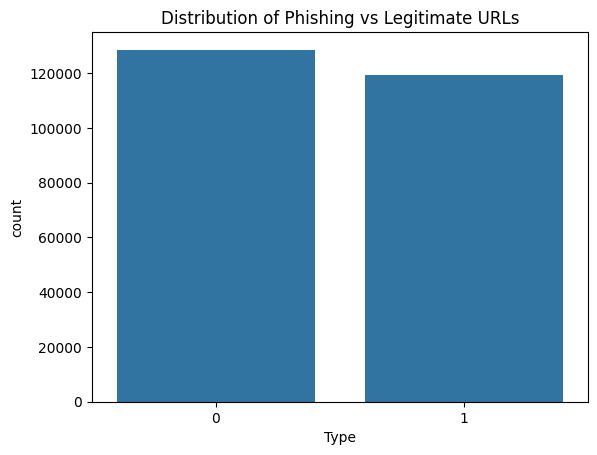

,count
Type,
0,128541
1,119409


In [ ]:
# Check distribution of phishing (1) vs legitimate (0)
sns.countplot(x='Type', data=df)
plt.title('Distribution of Phishing vs Legitimate URLs')
plt.show()

# Unique values in target
df['Type'].value_counts()

In [ ]:
# Separate features and label
X = df.drop('Type', axis=1)
y = df['Type']

In [ ]:
# First split: train vs temp
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, stratify=y, random_state=42)

# Second split: validation vs test

X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, stratify=y_temp, random_state=42)

In [ ]:
# Initialize scaler
scaler = StandardScaler()

# Fit only on training data
X_train_scaled = scaler.fit_transform(X_train)
X_val_scaled = scaler.transform(X_val)
X_test_scaled = scaler.transform(X_test)

In [ ]:
import joblib

# Save the full scaler object
joblib.dump(scaler, 'scaler.save')

['scaler.save']

In [ ]:
from google.colab import files
files.download('scaler.save')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
np.save("baseline_features.npy", X_val_scaled)  # Or your latest validation set

In [ ]:
import numpy as np

# Load full features
baseline_features = np.load("baseline_features.npy")

# Downsample to 2000 rows
sampled = baseline_features[np.random.choice(baseline_features.shape[0], size=2000, replace=False)]

# Optionally convert to float32 (reduces size more)
sampled = sampled.astype(np.float32)

# Save
np.save("baseline_features_sampled.npy", sampled)

In [ ]:
from google.colab import files
files.download("baseline_features_sampled.npy")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train CNN Model (Feature Extractor)

We'll treat each row of features like a sequence (just like image rows), using Conv1D layers to learn local patterns across the URL features.

Reshape input for CNN Model

In [ ]:
# Reshape input for Conv1D: (samples, features, 1)
X_train_cnn = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_val_cnn = X_val_scaled.reshape(X_val_scaled.shape[0], X_val_scaled.shape[1], 1)
X_test_cnn = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

Build CNN Model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv1D, MaxPooling1D, Flatten, Dense, Dropout
import time  # ⏱️ Import time module

# Prepare input
input_cnn = Input(shape=(X_train_scaled.shape[1], 1), name="cnn_input")

x = Conv1D(64, kernel_size=3, activation='relu')(input_cnn)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(128, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Conv1D(256, kernel_size=3, activation='relu')(x)
x = MaxPooling1D(pool_size=2)(x)
x = Flatten()(x)
x = Dense(64, activation='relu')(x)
x = Dropout(0.3)(x)
output_cnn = Dense(1, activation='sigmoid')(x)

cnn_model = Model(inputs=input_cnn, outputs=output_cnn)
cnn_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# ⏱️ Start timer
start_time = time.time()

# Train
cnn_model.fit(
    X_train_scaled.reshape(-1, X_train_scaled.shape[1], 1),
    y_train,
    epochs=10,
    batch_size=64,
    validation_data=(X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1), y_val),
    verbose=1
)

# ⏱️ End timer
end_time = time.time()
print("🕒 CNN Training Time:", round(end_time - start_time, 2), "seconds")

# Save
cnn_model.save("cnn_model.keras", include_optimizer=False)

Epoch 1/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 75s 27ms/step - accuracy: 0.8341 - loss: 0.3768 - val_accuracy: 0.8783 - val_loss: 0.2906
Epoch 2/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 65s 24ms/step - accuracy: 0.8807 - loss: 0.2875 - val_accuracy: 0.8827 - val_loss: 0.2760
Epoch 3/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 82s 24ms/step - accuracy: 0.8872 - loss: 0.2713 - val_accuracy: 0.8929 - val_loss: 0.2620
Epoch 4/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 65s 24ms/step - accuracy: 0.8935 - loss: 0.2580 - val_accuracy: 0.8913 - val_loss: 0.2638
Epoch 5/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 66s 24ms/step - accuracy: 0.8977 - loss: 0.2488 - val_accuracy: 0.8982 - val_loss: 0.2468
Epoch 6/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.8987 - loss: 0.2471 - val_accuracy: 0.9012 - val_loss: 0.2440
Epoch 7/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 84s 24ms/step - accuracy: 0.9029 - loss: 0.2392 - val_accuracy: 0.9007 - val_loss: 0.2432
Epoch 8/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 80s 24ms/step - accuracy: 0.9041 -

In [ ]:
# Predict
y_pred_cnn = (cnn_model.predict(X_test_cnn) > 0.5).astype("int32")

# Metrics
print("🧪 CNN Model Evaluation:")
print("Accuracy:", accuracy_score(y_test, y_pred_cnn))
print("Precision:", precision_score(y_test, y_pred_cnn))
print("Recall:", recall_score(y_test, y_pred_cnn))
print("F1 Score:", f1_score(y_test, y_pred_cnn))

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step
🧪 CNN Model Evaluation:
Accuracy: 0.9042292904578818
Precision: 0.9257654877759316
Recall: 0.870980348369808
F1 Score: 0.8975376826602233


In [ ]:
print("\n🔍 Features used by CNN:")
for i, col in enumerate(X.columns):
    print(f"{i+1}. {col}")


🔍 Features used by CNN:
1. url_length
2. number_of_dots_in_url
3. having_repeated_digits_in_url
4. number_of_digits_in_url
5. number_of_special_char_in_url
6. number_of_hyphens_in_url
7. number_of_underline_in_url
8. number_of_slash_in_url
9. number_of_questionmark_in_url
10. number_of_equal_in_url
11. number_of_at_in_url
12. number_of_dollar_in_url
13. number_of_exclamation_in_url
14. number_of_hashtag_in_url
15. number_of_percent_in_url
16. domain_length
17. number_of_dots_in_domain
18. number_of_hyphens_in_domain
19. having_special_characters_in_domain
20. number_of_special_characters_in_domain
21. having_digits_in_domain
22. number_of_digits_in_domain
23. having_repeated_digits_in_domain
24. number_of_subdomains
25. having_dot_in_subdomain
26. having_hyphen_in_subdomain
27. average_subdomain_length
28. average_number_of_dots_in_subdomain
29. average_number_of_hyphens_in_subdomain
30. having_special_characters_in_subdomain
31. number_of_special_characters_in_subdomain
32. having_di

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


Train the LSTM Model

📌 What LSTM does:

Learns temporal or sequential dependencies in the feature vector.

Complements CNN (which learns spatial/local patterns).

Reshape input for lstm
LSTM expects a 3D input of shape:
(samples, timesteps, features_per_timestep)
We'll treat each feature vector as a sequence of 1 time step.

In [ ]:
# Reshape X_train, X_val, X_test to 3D for LSTM
X_train_lstm = np.expand_dims(X_train_scaled, axis=1)
X_val_lstm   = np.expand_dims(X_val_scaled, axis=1)
X_test_lstm  = np.expand_dims(X_test_scaled, axis=1)

# Confirm new shape
print("LSTM input shape:", X_train_lstm.shape)

LSTM input shape: (173565, 1, 41)


Build lstm model

Train the lstm model

In [ ]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout

input_lstm = Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2]), name="lstm_input")
x = LSTM(128, return_sequences=False)(input_lstm)
x = Dropout(0.3)(x)
x = Dense(64, activation='relu')(x)
output_lstm = Dense(1, activation='sigmoid')(x)

lstm_model = Model(inputs=input_lstm, outputs=output_lstm)

# Compile and train
lstm_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
lstm_model.fit(X_train_lstm, y_train, epochs=10, batch_size=64, validation_data=(X_val_lstm, y_val))

# ✅ Save correctly for Render
lstm_model.save("lstm_model.keras", include_optimizer=False)

Epoch 1/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 21s 7ms/step - accuracy: 0.8269 - loss: 0.3811 - val_accuracy: 0.8758 - val_loss: 0.2934
Epoch 2/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 22s 8ms/step - accuracy: 0.8751 - loss: 0.2959 - val_accuracy: 0.8846 - val_loss: 0.2781
Epoch 3/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8823 - loss: 0.2802 - val_accuracy: 0.8870 - val_loss: 0.2692
Epoch 4/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8852 - loss: 0.2745 - val_accuracy: 0.8886 - val_loss: 0.2644
Epoch 5/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 20s 7ms/step - accuracy: 0.8877 - loss: 0.2686 - val_accuracy: 0.8932 - val_loss: 0.2594
Epoch 6/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 19s 7ms/step - accuracy: 0.8891 - loss: 0.2646 - val_accuracy: 0.8933 - val_loss: 0.2556
Epoch 7/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 19s 6ms/step - accuracy: 0.8919 - loss: 0.2578 - val_accuracy: 0.8940 - val_loss: 0.2507
Epoch 8/10
2712/2712 ━━━━━━━━━━━━━━━━━━━━ 22s 7ms/step - accuracy: 0.8930 - loss: 0

Evaluate on lstm test data

In [ ]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict and round output to 0 or 1
y_pred_lstm = (lstm_model.predict(X_test_lstm) > 0.5).astype("int32")

# Evaluation metrics
acc_lstm = accuracy_score(y_test, y_pred_lstm)
prec_lstm = precision_score(y_test, y_pred_lstm)
rec_lstm = recall_score(y_test, y_pred_lstm)
f1_lstm = f1_score(y_test, y_pred_lstm)

print("\n🧪 LSTM Model Evaluation:")
print(f"Accuracy:  {acc_lstm}")
print(f"Precision: {prec_lstm}")
print(f"Recall:    {rec_lstm}")
print(f"F1 Score:  {f1_lstm}")

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step

🧪 LSTM Model Evaluation:
Accuracy:  0.9025891968918882
Precision: 0.9220272904483431
Recall:    0.8714269763287181
F1 Score:  0.8960133176430068


In [ ]:
from google.colab import files

# Save without optimizer if not done already
cnn_model.save("cnn_model.keras", include_optimizer=False)
lstm_model.save("lstm_model.keras", include_optimizer=False)

# Download to local machine
files.download("cnn_model.keras")
files.download("lstm_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

Train the XGBoost Model (Base Model 3)

XGBoost works best with structured, preprocessed tabular data — perfect for our current features.

Train xgboost on scaled data

In [ ]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_scaled, y_train)

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:20:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=None, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, random_state=None, ...)

Evaluate xgboost

In [ ]:
y_pred_xgb = xgb_model.predict(X_test_scaled)

# XGBoost evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

acc_xgb = accuracy_score(y_test, y_pred_xgb)
prec_xgb = precision_score(y_test, y_pred_xgb)
rec_xgb = recall_score(y_test, y_pred_xgb)
f1_xgb = f1_score(y_test, y_pred_xgb)

print("\n🧪 XGBoost Model Evaluation:")
print(f"Accuracy:  {acc_xgb}")
print(f"Precision: {prec_xgb}")
print(f"Recall:    {rec_xgb}")
print(f"F1 Score:  {f1_xgb}")


🧪 XGBoost Model Evaluation:
Accuracy:  0.9117844755733606
Precision: 0.9284333821376282
Recall:    0.8850491290754802
F1 Score:  0.9062223111441392


Build the Meta-Learner (FCNN Stacking Layer)

Now that:

CNN ✅

LSTM ✅

XGBoost ✅


We can stack all their predictions and pass them into a fully connected neural network to learn the final classification.


📌 1. Collect Predictions from All Base Models

We'll collect their probability outputs on the validation set:

In [ ]:
# Probabilities from CNN
cnn_val_preds = cnn_model.predict(X_val_cnn).flatten()

# Probabilities from LSTM
lstm_val_preds = lstm_model.predict(X_val_lstm).flatten()

# Probabilities from XGBoost
xgb_val_preds = xgb_model.predict_proba(X_val_scaled)[:, 1]

# Stack into meta-input
meta_X_val = np.column_stack((cnn_val_preds, lstm_val_preds, xgb_val_preds))

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


Do the same for the test set (to evaluate later):

In [ ]:
cnn_test_preds = cnn_model.predict(X_test_cnn).flatten()
lstm_test_preds = lstm_model.predict(X_test_lstm).flatten()
xgb_test_preds = xgb_model.predict_proba(X_test_scaled)[:, 1]

meta_X_test = np.column_stack((cnn_test_preds, lstm_test_preds, xgb_test_preds))

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step


Build and Train the Meta-Learner (FCNN)

In [ ]:
input_meta = Input(shape=(3,), name="meta_input")
x = Dense(64, activation='relu')(input_meta)
x = Dropout(0.3)(x)
x = Dense(32, activation='relu')(x)
output_meta = Dense(1, activation='sigmoid')(x)

meta_model = Model(inputs=input_meta, outputs=output_meta)
meta_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Prepare meta input
cnn_val_preds = cnn_model.predict(X_val_scaled.reshape(-1, X_val_scaled.shape[1], 1)).flatten()
lstm_val_preds = lstm_model.predict(X_val_scaled.reshape(-1, 1, X_val_scaled.shape[1])).flatten()
xgb_val_preds = xgb_model.predict_proba(X_val_scaled)[:, 1]

meta_X_val = np.column_stack((cnn_val_preds, lstm_val_preds, xgb_val_preds))

# Train
meta_model.fit(meta_X_val, y_val, epochs=10, batch_size=32, verbose=1)

# Save
meta_model.save("meta_model.keras", include_optimizer=False)

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 5s 5ms/step
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step
Epoch 1/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.8632 - loss: 0.3254
Epoch 2/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9118 - loss: 0.2284
Epoch 3/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9110 - loss: 0.2260
Epoch 4/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9101 - loss: 0.2278
Epoch 5/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9090 - loss: 0.2282
Epoch 6/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9116 - loss: 0.2214
Epoch 7/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 2ms/step - accuracy: 0.9118 - loss: 0.2216
Epoch 8/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9088 - loss: 0.2247
Epoch 9/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - accuracy: 0.9086 - loss: 0.2227
Epoch 10/10
1163/1163 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9118 - loss: 0.2193


Evaluate Meta-Learner

In [ ]:
# Final evaluation on test set
meta_test_preds = meta_model.predict(meta_X_test).flatten()
meta_test_preds_binary = (meta_test_preds > 0.5).astype(int)

acc_meta = accuracy_score(y_test, meta_test_preds_binary)
prec_meta = precision_score(y_test, meta_test_preds_binary)
rec_meta = recall_score(y_test, meta_test_preds_binary)
f1_meta = f1_score(y_test, meta_test_preds_binary)

print("\n🧪 Meta-Learner Evaluation (Final Stacked Model):")
print(f"Accuracy:  {acc_meta}")
print(f"Precision: {prec_meta}")
print(f"Recall:    {rec_meta}")
print(f"F1 Score:  {f1_meta}")

1163/1163 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step

🧪 Meta-Learner Evaluation (Final Stacked Model):
Accuracy:  0.9130750410023392
Precision: 0.9298389458272328
Recall:    0.8863890129522108
F1 Score:  0.9075942492925944


In [ ]:
from google.colab import files
files.download("meta_model.keras")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import numpy as np
from sklearn.preprocessing import StandardScaler
import xgboost as xgb

# Assume these are your trained models:
# scaler = StandardScaler().fit(...)
# xgb_model = xgb.XGBClassifier().fit(...)

# 🔸 Save Scaler as .npy
np.save("scaler_params.npy", [scaler.mean_, scaler.scale_])

# 🔸 Save XGBoost model as .json
xgb_model.save_model("xgb_model.json")

# ✅ To download them if using Colab:
from google.colab import files
files.download("scaler_params.npy")
files.download("xgb_model.json")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import joblib

# Save CNN model
cnn_model.save("cnn_model.h5")

# Save LSTM model
lstm_model.save("lstm_model.h5")

# # Save XGBoost model
# joblib.dump(xgb_model, "xgb_model.pkl")

# Save meta-model (stacked model)
meta_model.save("meta_model.h5")

# # Save the scaler
# joblib.dump(scaler, "scaler.pkl")

In [ ]:
from google.colab import files

# Download each model
files.download("cnn_model.h5")
files.download("lstm_model.h5")
files.download("meta_model.h5")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [ ]:
import tensorflow as tf
print(tf.__version__)

2.19.0


In [ ]:
# -----------------------------------
# ✅ Final Phishing Detection Interface (Fully Plugged)
# -----------------------------------
import numpy as np
import tldextract
import re
import math
import time
import requests
import whois
import socket
import joblib
import ssl
import certifi
from urllib.parse import urlparse
from bs4 import BeautifulSoup
import warnings
warnings.filterwarnings("ignore")

from tensorflow.keras.models import load_model
from xgboost import XGBClassifier
import pickle

# ----------------------------
# ✅ Load Trained Models
# ----------------------------
scaler = joblib.load("scaler.pkl")
xgb_model = pickle.load(open("xgb_model.pkl", "rb"))
cnn_model = load_model("cnn_model.keras")
lstm_model = load_model("lstm_model.keras")
meta_model = load_model("meta_model.keras")

# ----------------------------
# ✅ Feature Extraction Utils
# ----------------------------
def get_entropy(s):
    prob = [float(s.count(c)) / len(s) for c in dict.fromkeys(list(s))]
    return -sum([p * math.log(p) / math.log(2.0) for p in prob]) if prob else 0

def is_ip(domain):
    try:
        socket.inet_aton(domain)
        return True
    except:
        return False

def extract_features_from_url(url):
    try:
        parsed = urlparse(url)
        domain = parsed.netloc
        path = parsed.path
        extracted_info = tldextract.extract(url)
        subdomain = extracted_info.subdomain
        domain_part = subdomain if subdomain else ""
        subdomains = subdomain.split(".") if subdomain else []
        special_chars = r"[-_@=$!%*#?&]"

        return np.array([[
            len(url), url.count("."), int(bool(re.search(r"(\d)\1{1,}", url))), len(re.findall(r"\d", url)),
            len(re.findall(special_chars, url)), url.count("-"), url.count("_"), url.count("/"),
            url.count("?"), url.count("="), url.count("@"), url.count("$"), url.count("!"),
            url.count("#"), url.count("%"), len(domain), domain.count("."), domain.count("-"),
            int(bool(re.search(special_chars, domain))), len(re.findall(special_chars, domain)),
            int(bool(re.search(r"\d", domain))), len(re.findall(r"\d", domain)),
            int(bool(re.search(r"(\d)\1{1,}", domain))), len(subdomains), int("." in domain_part),
            int("-" in domain_part), sum(len(s) for s in subdomains)/len(subdomains) if subdomains else 0,
            sum(s.count(".") for s in subdomains)/len(subdomains) if subdomains else 0,
            sum(s.count("-") for s in subdomains)/len(subdomains) if subdomains else 0,
            int(any(re.search(special_chars, s) for s in subdomains)),
            sum(len(re.findall(special_chars, s)) for s in subdomains),
            int(any(char.isdigit() for char in domain_part)),
            sum(char.isdigit() for char in domain_part),
            int(bool(re.search(r"(\d)\1{1,}", domain_part))),
            int(bool(path)), len(path), int(bool(parsed.query)), int(bool(parsed.fragment)),
            int("#" in url), get_entropy(url), get_entropy(domain)
        ]])
    except Exception as e:
        print("❌ Feature extraction failed:", e)
        return None

# ----------------------------
# ✅ Real-Time Checks
# ----------------------------
def get_domain_age_days(domain):
    try:
        info = whois.whois(domain)
        creation = info.creation_date
        if isinstance(creation, list):
            creation = creation[0]
        age = (time.time() - creation.timestamp()) / 86400 if creation else 0
        return int(age)
    except:
        return -1

def check_content_for_keywords(url):
    try:
        r = requests.get(url, timeout=5)
        if r.status_code != 200:
            return 0, "No content"
        soup = BeautifulSoup(r.text, "html.parser")
        text = soup.get_text().lower()
        keywords = ["login", "verify", "account", "secure", "password", "update", "signin", "security"]
        return int(any(k in text for k in keywords)), soup.title.string.strip() if soup.title else "No Title"
    except:
        return 0, "Not reachable"

def has_ssl_certificate(url):
    try:
        domain = urlparse(url).hostname
        context = ssl.create_default_context(cafile=certifi.where())
        conn = context.wrap_socket(socket.socket(), server_hostname=domain)
        conn.settimeout(5)
        conn.connect((domain, 443))
        return True
    except:
        return False

# ----------------------------
# ✅ Interface to Test URL
# ----------------------------
def test_url_interface():
    url = input("🔗 Paste the URL to test: ").strip()
    print(f"\n🔍 Checking URL: {url}\n")
    start = time.time()

    parsed = urlparse(url)
    domain = parsed.hostname
    uses_https = url.lower().startswith("https://")
    ssl_ok = has_ssl_certificate(url)
    domain_age = get_domain_age_days(domain)
    is_ip_used = is_ip(domain)
    redirects = 0
    try:
        r = requests.get(url, timeout=5, allow_redirects=True)
        redirects = len(r.history)
    except:
        print("⚠️ Domain may not resolve or is inactive")

    content_flag, page_title = check_content_for_keywords(url)
    print(f"📆 Domain Age: {domain_age} days")
    print(f"🔐 HTTPS: {'✅' if uses_https else '❌'}")
    print(f"🔐 SSL Certificate: {'✅' if ssl_ok else '❌'}")
    print(f"🌐 Uses IP Address: {'✅' if is_ip_used else '❌'}")
    print(f"🔁 Redirects: {redirects}")
    print(f"🧠 Page Title: {page_title}")
    print(f"🔍 Content Scan: {'Suspicious' if content_flag else 'Clean'}")

    features = extract_features_from_url(url)
    if features is None:
        print("❌ Could not extract features")
        return
    features_scaled = scaler.transform(features)

    cnn_input = features_scaled.reshape(features_scaled.shape[0], features_scaled.shape[1], 1)
    lstm_input = features_scaled.reshape(features_scaled.shape[0], 1, features_scaled.shape[1])

    cnn_pred = cnn_model.predict(cnn_input, verbose=0)[0][0]
    lstm_pred = lstm_model.predict(lstm_input, verbose=0)[0][0]
    xgb_pred = xgb_model.predict_proba(features_scaled)[0][1]

    meta_input = np.array([[cnn_pred, lstm_pred, xgb_pred]])
    final_pred = meta_model.predict(meta_input, verbose=0)[0][0]
    confidence = round(final_pred * 100, 2)

    if final_pred >= 0.7:
        verdict = "🛑 Phishing"
        explanation = "⚠️ The system is highly confident this website is phishing."
    elif 0.4 <= final_pred < 0.7 or domain_age < 30 or content_flag:
        verdict = "⚠️ Suspicious"
        explanation = "⚠️ This site shows some red flags like new domain, suspicious content, or unclear security."
    else:
        verdict = "✅ Legitimate"
        explanation = f"✅ The system believes this website is safe."

    # ✅ Output
    print(f"\n📊 CNN Confidence (Phishing Probability): CNN {round(cnn_pred * 100, 2)}%")
    print(f"📊 LSTM Confidence (Phishing Probability): LSTM {round(lstm_pred * 100, 2)}%")
    print(f"📊 XGBoost Confidence (Phishing Probability): XGBoost {round(xgb_pred * 100, 2)}%")
    print("---")
    print(f"🧠 Final Verdict: {verdict}")
    print(f"🔎 Confidence Score: {confidence}%")
    print(f"💬 Explanation: {explanation}")
    print(f"\n⏱ Detection Time: {round(time.time() - start, 3)} seconds")

# ✅ Run like this:
test_url_interface()